# <font color=red>SMU DS 7331 DATA MINING - LAB 2 CLASSIFICATION</font>

**Team Members:**
- YuMei Bennett
- Liang Huang
- Ganesh Kodi
- Eric McCandless

## <font color=blue>DATA PREPARATION PART 1</font>

**Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.**

Initial prep of data:

In [63]:
# import all necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Imputer
import seaborn as sns

#Read in dataset.
col_names = ['age', 'employ_type', 'pop_num', 'edu_level', 'edu_years', 'marital', 'occ', 'relation', 'race', 'gender', 'cap_gain', 'cap_loss', 'hours_week', 'country_orig', 'income']
df = pd.read_csv('adult.csv', names=col_names, header=None)

#Replace "?" with "Other_cat"
df['employ_type'] = df['employ_type'].str.replace('?','Other_cat')
df['occ'] = df['occ'].str.replace('?','Other_cat')
df['country_orig'] = df['country_orig'].str.replace('?','Other_cat')

# Binary encoding of the target variable
df['income'] = df['income'].apply(lambda inc: 0 if inc ==" <=50K" else 1) 

#Transform employ_type into multiple columns with 0 and 1
# use pd.concat to join the new columns with original dataframe then drop the original 'employ_type' column (don't need it anymore)
df = pd.concat([df,pd.get_dummies(df['employ_type'], prefix='emp')],axis=1)
df.drop(['employ_type'],axis=1, inplace=True)

#Transform gender into multiple columns with 0 and 1
# use pd.concat to join the new columns with original dataframe then drop the original 'gender' column (don't need it anymore)
df = pd.concat([df,pd.get_dummies(df['gender'], prefix='gen')],axis=1)
df.drop(['gender'],axis=1, inplace=True)

#Transform race into multiple columns with 0 and 1
# use pd.concat to join the new columns with original dataframe then drop the original 'race' column (don't need it anymore)
df = pd.concat([df,pd.get_dummies(df['race'], prefix='rac')],axis=1)
df.drop(['race'],axis=1, inplace=True)

#Transform education_level into multiple columns with 0 and 1
# use pd.concat to join the new columns with original dataframe then drop the original 'edu_level' column (don't need it anymore)
df = pd.concat([df,pd.get_dummies(df['edu_level'], prefix='edu')],axis=1)
df.drop(['edu_level'],axis=1, inplace=True)

#Consolidate education levels because many of them have the similar impact to target income.
df['edu_ SomeCollege'] = df['edu_ Some-college'] + df['edu_ Assoc-acdm'] + df['edu_ Assoc-voc'] 
df['<HS'] = df['edu_ 12th'] + df['edu_ 11th'] + df['edu_ 10th'] + df['edu_ 9th'] + df['edu_ 7th-8th'] + df['edu_ 5th-6th']+ df['edu_ 1st-4th'] + df['edu_ Preschool'] 
df=df.drop(['edu_ Some-college','edu_ Assoc-acdm','edu_ Assoc-voc', 'edu_ 12th', 'edu_ 11th','edu_ 10th','edu_ 9th','edu_ 7th-8th','edu_ 7th-8th','edu_ 5th-6th','edu_ 1st-4th','edu_ Preschool'], 1)

# drop edu_years as it is highly correlated with edu_level.
df=df.drop(['edu_years'], 1)

#Transform relation into multiple columns with 0 and 1
# use pd.concat to join the new columns with original dataframe then drop the original 'relation' column (don't need it anymore)
df = pd.concat([df,pd.get_dummies(df['relation'], prefix='rel')],axis=1)
df.drop(['relation'],axis=1, inplace=True)

#Transform marital into multiple columns with 0 and 1
# use pd.concat to join the new columns with original dataframe then drop the original 'marital' column (don't need it anymore)
df = pd.concat([df,pd.get_dummies(df['marital'], prefix='mar')],axis=1)
df.drop(['marital'],axis=1, inplace=True)

#Consolidate marital status because too many similar categories.  Married-civ-spouse and Married-AF-spouse are similar as are non-married.
df['Married'] = df['mar_ Married-civ-spouse'] + df['mar_ Married-AF-spouse'] 
df['Sep_Div_Absent_Wid'] = df['mar_ Divorced'] + df['mar_ Separated'] + df['mar_ Widowed'] + df['mar_ Married-spouse-absent']
df['Never_Married'] = df['mar_ Never-married']
df=df.drop(['mar_ Married-civ-spouse','mar_ Married-AF-spouse','mar_ Divorced', 'mar_ Separated', 'mar_ Widowed','mar_ Married-spouse-absent','mar_ Never-married'], 1)

#Transform occ into multiple columns with 0 and 1
# use pd.concat to join the new columns with original dataframe then drop the original 'occ' column (don't need it anymore)
df = pd.concat([df,pd.get_dummies(df['occ'], prefix='occu')],axis=1)
df.drop(['occ'],axis=1, inplace=True)

#Consolidate occupation by combining 'Other-service', 'Other_cat', and 'Armed-Forces. 'Other' categories are combined because they are not defined and Armed-Forces has an extremely small number of occurences.
df['occu_ Other'] = df['occu_ Other-service'] + df['occu_ Other_cat'] + df['occu_ Armed-Forces'] 
df=df.drop(['occu_ Other-service','occu_ Other_cat','occu_ Armed-Forces'], 1)

# drop pop_num as population number is an assigned index number, it has no meaning or contribution to our target income.
df=df.drop(['pop_num'], 1)

# Combine all non-U.S. native countries as only ~10% people are not from US - code native country into binary 1=United-States
df['country_orig'] = df['country_orig'].apply(lambda inc: 1 if inc ==" United-States" else 0) 

# merge capital gain and capital losscap_gain and cap_loss as it can be mathmatically concatenated into a single feature cap_gain_loss = cap_gain - cap_loss.
df['cap_gain-loss'] = df['cap_gain'] - df['cap_loss'] 
df=df.drop(['cap_gain','cap_loss'], 1)
ds_nb=df.copy()
ds_knn=df.copy()
df.head(10)


,age,hours_week,country_orig,income,emp_ Federal-gov,emp_ Local-gov,emp_ Never-worked,emp_ Other_cat,emp_ Private,emp_ Self-emp-inc,...,occu_ Handlers-cleaners,occu_ Machine-op-inspct,occu_ Priv-house-serv,occu_ Prof-specialty,occu_ Protective-serv,occu_ Sales,occu_ Tech-support,occu_ Transport-moving,occu_ Other,cap_gain-loss
0,39,40,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2174
1,50,13,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,40,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,53,40,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,28,40,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,37,40,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,49,16,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7,52,45,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,31,50,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,14084
9,42,40,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5178


C:\Users\lhuang\AppData\Local\Continuum\anaconda37\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


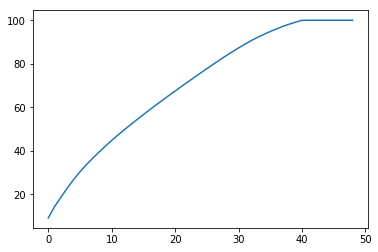

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# we want to predict the X and y data as follows:
if 'income' in df:
    y = df['income'].values # get the labels we want
    del df['income'] # get rid of the class label
    X = df.values # use everything else to predict!

X = scale(X)
pca = PCA(n_components=49)
pca.fit(X)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)



Based on above plot, we will be considering 40 features for our model building

In [65]:
# Taking only first 40 important components for building model and leaving out remaining 9
pca = PCA(n_components=40)
pca.fit(X)
X=pca.fit_transform(X)


## <font color=blue>DATA PREPARATION PART 2</font>

**Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).**

## <font color=blue>MODELING AND EVALUATION 1</font>

**Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.**

We will use accuracy, precision and recall to evaluate the effectiveness of the model. The accuracy metric will be used to assess how many records this model correctly classifies into our target varible, "<=50K" and ">50K."

But, we will also look at the precision and recall metrics. This is important to account for possible imbalanced classification problems in which we have two classes we need to identify, but one category represents the overwhelming majority of the data points. Recall tells us how effective the model is in finding all the relevant cases within a dataset - the number of true positives divided by the number of true positives plus the number of false negatives. Precision tells us the proportion of data points our model says was relevant are actually relevant - the number of true positives divided by the number of true positives plus the number of false positives.

## <font color=blue>MODELING AND EVALUATION 2</font>

**Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.**

We had chosen StratifiedKFold method for dividing data into training and testing, since compared to regular cross-validation, stratification provides better validation, both in terms of bias and variance. Stratification is a technique where we rearrange the data in a way that each fold has a good representation of the whole dataset. It forces each fold to have at least m instances of each class. This approach ensures that one class of data is not overrepresented especially when the target variable is unbalanced. For example in a binary classification problem where each class comprises 50% of the data, it is best to arrange the data such that in every fold, each class comprises around half the instances.  

In [66]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10)



## <font color=blue>MODELING AND EVALUATION 3</font>

**Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!**

**Model 1: Logistic Regression**

iteration 1
roc 0.7543910910477604
accuracy 0.8409579367516119
confusion matrix
 [[2278  194]
 [ 324  461]]
iteration 2
roc 0.7452942341985339
accuracy 0.8433660933660934
confusion matrix
 [[2310  162]
 [ 348  436]]
iteration 3
roc 0.7600554785020806
accuracy 0.8485872235872236
confusion matrix
 [[2301  171]
 [ 322  462]]
iteration 4
roc 0.7403304768509347
accuracy 0.8338452088452089
confusion matrix
 [[2276  196]
 [ 345  439]]
iteration 5
roc 0.7551557030579222
accuracy 0.8464373464373465
confusion matrix
 [[2302  170]
 [ 330  454]]
iteration 6
roc 0.7575663760649891
accuracy 0.8461302211302212
confusion matrix
 [[2295  177]
 [ 324  460]]
iteration 7
roc 0.7643959282742223
accuracy 0.8531941031941032
confusion matrix
 [[2313  159]
 [ 319  465]]
iteration 8
roc 0.7692337857473086
accuracy 0.8565724815724816
confusion matrix
 [[2318  154]
 [ 313  471]]
iteration 9
roc 0.7671492140545538
accuracy 0.8547297297297297
confusion matrix
 [[2314  158]
 [ 315  469]]
iteration 10
roc 0.757207251

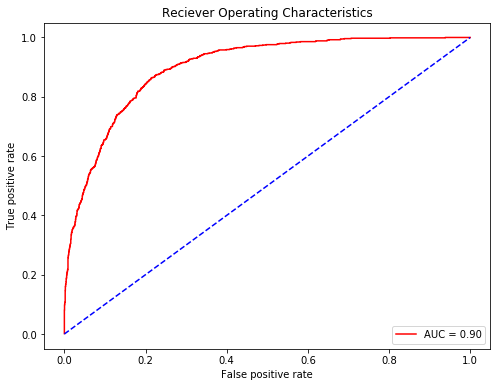

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.75')

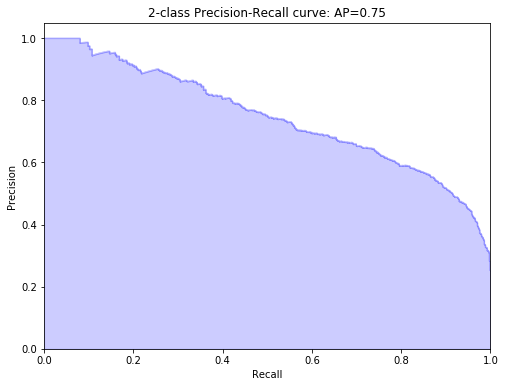

In [67]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from inspect import signature

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=0.05, class_weight=None) # get object

cv_score =[]
i = 1
for train_indices, test_indices in skf.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    score = mt.roc_auc_score(y_test,y_hat)
    cv_score.append(score)
    print("iteration", i )
    print("roc", score )
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    i = i+1

print('Cross Validation',cv_score,'\nMean cv Score',np.mean(cv_score))

y_score = lr_clf.decision_function(X_test)
average_precision = mt.average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, _ = mt.precision_recall_curve(y_test, y_score)

print('Average recall score: {0:0.2f}'.format(
      np.average(recall)))
print('Average precision score: {0:0.2f}'.format(
      np.average(precision)))
##print('Average accuracy score: {0:0.2f}'.format(
##      np.average(accuracy)))
## print(scores.mean())


proba = lr_clf.predict_proba(X_test)[:,1]
frp,trp, threshold = mt.roc_curve(y_test,proba)
roc_auc_ = mt.auc(frp,trp)

plt.figure(figsize=(8,6))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

plt.show()

plt.figure(figsize=(8,6))

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

For Logistic Regression, we get the following metrics:

Accuracy = max 85%
Precision = 52%
Recall = 79%


**Model 2 Naive Bayes**

In [68]:
def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value (one per face)')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()
    

In [69]:
ds_nb.head(10)

,age,hours_week,country_orig,income,emp_ Federal-gov,emp_ Local-gov,emp_ Never-worked,emp_ Other_cat,emp_ Private,emp_ Self-emp-inc,...,occu_ Handlers-cleaners,occu_ Machine-op-inspct,occu_ Priv-house-serv,occu_ Prof-specialty,occu_ Protective-serv,occu_ Sales,occu_ Tech-support,occu_ Transport-moving,occu_ Other,cap_gain-loss
0,39,40,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2174
1,50,13,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,40,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,53,40,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,28,40,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,37,40,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,49,16,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7,52,45,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,31,50,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,14084
9,42,40,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5178


In [70]:
from numpy import array
from numpy import count_nonzero
#Separate target vs. data into two different data frame
ds=ds_nb
ds.target=ds['income']
ds.data=ds
del ds.data['income']
ds.data=ds.data.values

# this holds the continuous feature data (which is tfidf)
print ('features shape:', ds.data.shape) # there are ~11000 instances and ~130k features per instance
print ('target shape:', ds.target.shape) 

features shape: (32561, 49)
target shape: (32561,)


C:\Users\lhuang\AppData\Local\Continuum\anaconda37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
C:\Users\lhuang\AppData\Local\Continuum\anaconda37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


C:\Users\lhuang\AppData\Local\Continuum\anaconda37\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\lhuang\AppData\Local\Continuum\anaconda37\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Total accuracy 0.7829919228524922
Per class accuracy [0.81027508 0.69697743]


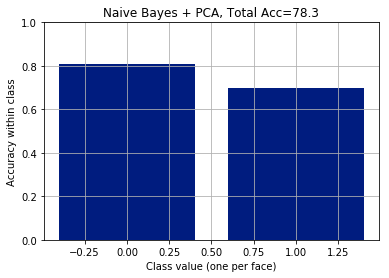

In [82]:
##copy/paste leon's code here
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics as mt

# create variables we are more familiar with
X = ds.data
y = ds.target
yhat = np.zeros(y.shape) # we will fill this with predictions

scl = StandardScaler()
X = scl.fit_transform(X)
    
# setup pipeline to take PCA, then fit a different classifier
clf_pipe = Pipeline(
    [('PCA',PCA(n_components=40,svd_solver='randomized')),
     ('CLF',GaussianNB())]
)

yhat_score = np.zeros((y.shape[0],len(ds.target.shape)+1))

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in skf.split(X,y):
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])
    yhat_score[test] = clf_pipe.predict_proba(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print ('Total accuracy', total_accuracy)
per_class_acc_list = per_class_accuracy(y,yhat)
print ('Per class accuracy', per_class_acc_list)

plot_class_acc(y,yhat,title="Naive Bayes + PCA")

Total Accuracy: 0.7829919228524922
Average precision: 0.716057759199954
Average recall: 0.7536262536274144


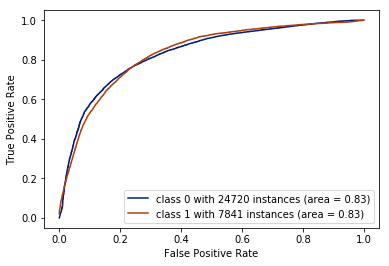

In [85]:
from sklearn import metrics as mt

freq_infreq_threshold = 40

# get various measures of performance
total_accuracy = mt.accuracy_score(y, yhat)
per_class_acc_list = per_class_accuracy(y,yhat)

#prec_for_freq_classes = []
#recall_for_infreq_classes = []
rec_tot = []
prec_tot = []

for cls in np.unique(y):
    idx = (y==cls) # get classes
    ytmp_actual = np.zeros(y.shape) # make binary class problem
    ytmp_actual[idx] = 1 # set the instances for this specific class
    
    ytmp_predicted = np.zeros(y.shape) # binary prediction array
    ytmp_predicted[yhat==cls] = 1
    
    num_in_class = sum(idx)
    
    rec = mt.recall_score(ytmp_actual, ytmp_predicted)
    prec = mt.precision_score(ytmp_actual, ytmp_predicted)
    rec_tot.append(rec)
    prec_tot.append(prec)
    
print ('Total Accuracy:',total_accuracy)
print ('Average precision:',np.mean(prec_tot))
print ('Average recall:', np.mean(rec_tot))


import seaborn as sns
sns.set_palette("dark")
# code manipulated from http://scikit-learn.org/stable/auto_examples/plot_roc.html
from sklearn.preprocessing import label_binarize

# Compute ROC curve for a subset of interesting classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in np.unique(y):
    fpr[i], tpr[i], _ = mt.roc_curve(y, yhat_score[:, i], pos_label=i)
    roc_auc[i] = mt.auc(fpr[i], tpr[i])

for i in np.random.permutation(2)[0:2]:
    plt.plot(fpr[i], tpr[i], label='class {0} with {1} instances (area = {2:0.2f})'
                                   ''.format(i, sum(y==i), roc_auc[i]))

plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

For Naive Bayes, we get the following metrics:

Accuracy = 78.299% Precision = 71.606% Recall = 75.363%

**Model 3 KNN**

In [86]:
from numpy import array
from numpy import count_nonzero

# calculate sparsity
sparsity = 1.0 - ( count_nonzero(df) / float(df.size) )
print(sparsity)
# only 21% none zero values in dataset, pretty sparse

0.7953918829901052


In [87]:
#Separate target vs. data into two different data frame
ds=ds_knn
ds.target=ds['income']
ds.data=ds
del ds.data['income']
ds.data=ds.data.values

# this holds the continuous feature data (which is tfidf)
print ('features shape:', ds.data.shape) # there are ~11000 instances and ~130k features per instance
print ('target shape:', ds.target.shape) 

features shape: (32561, 49)
target shape: (32561,)


C:\Users\lhuang\AppData\Local\Continuum\anaconda37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lhuang\AppData\Local\Continuum\anaconda37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [ ]:
# We would like to gauge the model effectiveness by F measure. This is because 
# one, the dataset is inbanlanced, only ~23% instance map to target value of 1 (>50k)
# two, F measure is a combination of precision and recall, target "income" really has 
# no benefit to bias one way or the other.

In [ ]:
#from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


#cv = StratifiedShuffleSplit(ds.target, n_iter = 1, test_size = 0.5, train_size=0.5)
data=ds.data
labels=ds.target
sss = StratifiedShuffleSplit(n_splits=2,test_size = 0.5, train_size=0.5)
iter_num=0
for train_index, test_index in sss.split(data, labels):
    x_train, x_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    # train the reusable KNN classifier on the training data       
    clf = KNeighborsClassifier(n_neighbors=8, weights='uniform', metric='euclidean')
    clf.fit(x_train, y_train)
    y_hat = clf.predict(x_test) 

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = accuracy_score(y_test,y_hat)
    precision = precision_score(y_test, y_hat)
    recall = recall_score(y_test, y_hat)
    f1=f1_score(y_test, y_hat)
    conf = confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("f1 score", f1 )
    print("precision score", precision )
    print("recall score", recall )
    print("confusion matrix\n",conf)
    iter_num+=1




In [ ]:
# We have tried 10 fold cross validation, all  10 round of result are amazingly similar. This is why we do not
# believe for this dataset, 10 folder validation is needed. 
# We've normalized data, that did not make any recognizable model improvement as well. The reason most likely due to
# the nature of the dataset are large, only few features are continues input, rest are all hot shot coded already, 
# data normalization does not play a huge role here. Another reason is we did see from mini lab with the same 
# dataset, there is no significant important feature in predicting the target. 

In [ ]:
from sklearn import preprocessing
X = ds.data
y = ds.target
# normalize the data attributes
normalized_X = preprocessing.normalize(X)

Ndata=normalized_X
labels=y
sss = StratifiedShuffleSplit(n_splits=5,test_size = 0.5, train_size=0.5)
iter_num=0
for train_index, test_index in sss.split(Ndata, labels):
    x_train, x_test = Ndata[train_index], Ndata[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    # train the reusable KNN classifier on the training data       
    clf = KNeighborsClassifier(n_neighbors=8, weights='distance', metric='euclidean')
    clf.fit(x_train, y_train)
    y_hat = clf.predict(x_test) 

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = accuracy_score(y_test,y_hat)
    precision = precision_score(y_test, y_hat)
    recall = recall_score(y_test, y_hat)
    f1=f1_score(y_test, y_hat)
    conf = confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("f1 score", f1 )
    print("precision score", precision )
    print("recall score", recall )
    print("confusion matrix\n",conf)
    iter_num+=1



For KNN, we get the following metrics:

Accuracy = Max 83%
Precision = 72%
Recall = 56%


## <font color=blue>MODELING AND EVALUATION 4</font>

**Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.**

## <font color=blue>MODELING AND EVALUATION 5</font>

**Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.**

## <font color=blue>MODELING AND EVALUATION 6</font>

**Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.**

## <font color=blue>DEPLOYMENT</font>

**How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?**

Our model is useful for any dataset. Here in our assignment, we are using employment dataset. But this model can be modularized to reusable with any dataset. 

Model will be measured with 
 -- accuracy, 
 -- precision and 
 -- auc 

There are different way of deploying model
One of the option would be using serverless architecture in cloud like Function App in azure or lambda in AWS
We will build a simple serverless architecture that receives user requests, allows a remote machine to read and make predictions that are stored in the cloud and lets users receive the final results. 

The workflow steps are as follows:
1. User makes a prediction request by POSTing a message to endpoint/predict with his payload — text, image, audio or whatever data needs to be analyzed;
2. Server receives user request, saves payload and generates a unique task_id, which is sent back to User;
3. MLServer (machine learning server) queries Server to retrieve the next job;
4. Server sends task_id and payload of next job to MLServer;
5. MLServer processes payload and sends results of task_id to Server;
6. Server receives and stores task_id results;
7. User queries Server using task_id and retrieves results.

## <font color=blue>EXCEPTIONAL WORK</font>

**You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?**